In [13]:
import torch
import torch.nn as nn
from torch.nn import Linear, ReLU, CrossEntropyLoss, Conv2d, MaxPool2d, Module
from torch.optim import Adam
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import torch.optim as optim
import time as t
import os
import torch.nn.functional as F

In [14]:
print(torch.cuda.is_available())

False


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [16]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
  ])

In [17]:
os.getcwd()

'C:\\Users\\Madhava Reddy\\Desktop\\Data science projects'

In [18]:
dataset = ImageFolder('C:\\Users\\Madhava Reddy\\Desktop\\Data science projects\\archive2\\data', transform=transform)
num_classes = len(dataset.classes)

print(dataset[3][0].shape)
print(dataset.classes)
print(len(dataset))

torch.Size([3, 256, 256])
['cloudy', 'desert', 'green_area', 'water']
5631


In [19]:
batch_size = 32
# Cut 80% for training set and 20% for test set.
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,shuffle=True)

In [20]:
print(len(train_data))
print(len(test_data))

4504
1127


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes, input_size=(224, 224)):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dynamically compute the size of the fully connected layer
        self.fc_input_size = self._get_fc_input_size(input_size)
        
        self.fc1 = nn.Linear(self.fc_input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def _get_fc_input_size(self, input_size):
        # Function to compute the size of the fully connected layer
        test_input = torch.randn(1, 3, *input_size)
        conv1_output = self.conv1(test_input)
        pool1_output = self.pool(conv1_output)
        conv2_output = self.conv2(pool1_output)
        pool2_output = self.pool(conv2_output)
        return pool2_output.view(pool2_output.size(0), -1).size(1)

# Assuming you have 'transform' and 'num_classes' defined
input_size = (224, 224)
model = SimpleCNN(num_classes=num_classes, input_size=input_size)


In [22]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [38]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x262144 and 200704x128)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

In [ ]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Load the dataset
dataset = ImageFolder('C:\\Users\\Madhava Reddy\\Desktop\\Data science projects\\archive2\\data', transform=transform)
num_classes = len(dataset.classes)


In [ ]:
# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])


In [ ]:
# Create data loaders for training and testing sets
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [40]:
# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes, input_size=(224, 224)):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dynamically compute the size of the fully connected layer
        self.fc_input_size = self._get_fc_input_size(input_size)
        
        self.fc1 = nn.Linear(self.fc_input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def _get_fc_input_size(self, input_size):
        test_input = torch.randn(1, 3, *input_size)
        conv1_output = self.conv1(test_input)
        pool1_output = self.pool(conv1_output)
        conv2_output = self.conv2(pool1_output)
        pool2_output = self.pool(conv2_output)
        return pool2_output.view(pool2_output.size(0), -1).size(1)

# Instantiate the model
model = SimpleCNN(num_classes=num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

# Testing loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/10, Loss: 0.3442
Epoch 2/10, Loss: 0.1130
Epoch 3/10, Loss: 0.2881
Epoch 4/10, Loss: 0.3587
Epoch 5/10, Loss: 0.5022
Epoch 6/10, Loss: 0.2048
Epoch 7/10, Loss: 0.1269
Epoch 8/10, Loss: 0.3527
Epoch 9/10, Loss: 0.0690
Epoch 10/10, Loss: 0.3294
Test Accuracy: 87.76%


In [ ]:
# Testing loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

In [54]:
for i in range(100):
    print(f"Image {i + 1} - Predicted: {all_preds[i]}, Actual: {all_labels[i]}")
accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Image 1 - Predicted: 1, Actual: 1
Image 2 - Predicted: 3, Actual: 2
Image 3 - Predicted: 1, Actual: 1
Image 4 - Predicted: 0, Actual: 0
Image 5 - Predicted: 1, Actual: 1
Image 6 - Predicted: 2, Actual: 2
Image 7 - Predicted: 3, Actual: 2
Image 8 - Predicted: 3, Actual: 3
Image 9 - Predicted: 3, Actual: 2
Image 10 - Predicted: 2, Actual: 2
Image 11 - Predicted: 2, Actual: 2
Image 12 - Predicted: 0, Actual: 0
Image 13 - Predicted: 3, Actual: 2
Image 14 - Predicted: 3, Actual: 3
Image 15 - Predicted: 2, Actual: 2
Image 16 - Predicted: 2, Actual: 2
Image 17 - Predicted: 0, Actual: 0
Image 18 - Predicted: 1, Actual: 1
Image 19 - Predicted: 0, Actual: 0
Image 20 - Predicted: 0, Actual: 0
Image 21 - Predicted: 1, Actual: 1
Image 22 - Predicted: 3, Actual: 3
Image 23 - Predicted: 0, Actual: 0
Image 24 - Predicted: 3, Actual: 2
Image 25 - Predicted: 0, Actual: 0
Image 26 - Predicted: 0, Actual: 0
Image 27 - Predicted: 1, Actual: 1
Image 28 - Predicted: 1, Actual: 1
Image 29 - Predicted: 3, Actu

In [41]:
# Save the trained model
torch.save(model.state_dict(), 'Satellite image.pth')


Epoch 1/10, Loss: 0.1997
Epoch 2/10, Loss: 0.1817
Epoch 3/10, Loss: 0.1714
Epoch 4/10, Loss: 0.1958
Epoch 5/10, Loss: 0.1822
Epoch 6/10, Loss: 0.1836
Epoch 7/10, Loss: 0.1948
Epoch 8/10, Loss: 0.1659
Epoch 9/10, Loss: 0.1533
Epoch 10/10, Loss: 0.1619


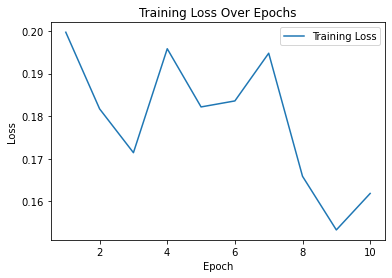

In [44]:
import matplotlib.pyplot as plt

# Lists to store training loss for each epoch
train_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_epoch_loss:.4f}')

# Plotting the training loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [55]:
new_image_path = 'C:\\Users\\Madhava Reddy\\Desktop\\Data science projects\\archive2\\data\\desert\\desert(135).jpg'


In [72]:
from PIL import Image
import torchvision.transforms as transforms

# Load and preprocess the single image
image_path = 'C:\\Users\\Madhava Reddy\\Desktop\\Data science projects\\archive2\\data\\cloudy\\train_1360.jpg'



In [ ]:
class_names = ['cloudy', 'desert', 'green_area', 'water']

In [73]:
image = Image.open(image_path).convert("RGB")
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = preprocess(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension



In [74]:

model = SimpleCNN(num_classes=num_classes)  
model

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=200704, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [75]:

# Set the model to evaluation mode
model.eval()

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=200704, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [76]:
# Make prediction
with torch.no_grad():
    output = model(input_image)
    
output

tensor([[ 0.1638, -0.0232, -0.0661,  0.0041]])

In [77]:
# Convert the output to probabilities using softmax
probabilities = torch.nn.functional.softmax(output[0], dim=0)
probabilities

tensor([0.2877, 0.2386, 0.2286, 0.2452])

In [78]:
predicted_class = torch.argmax(probabilities).item()
predicted_class

0

In [81]:
class_names = ['cloudy', 'desert', 'green_area', 'water']
# Create a dictionary mapping class indices to class names
class_idx_to_name = {idx: name for idx, name in enumerate(class_names)}

# Display the class names with their indices
print("Class Names with Indices:")
for idx, name in class_idx_to_name.items():
    print(f"Index {idx}: {name}")

# Use the dictionary to get the class name for the predicted class
predicted_class_name = class_idx_to_name[predicted_class]

# Display the predicted class name
print(f"Predicted Class Name: {predicted_class_name}")

Class Names with Indices:
Index 0: cloudy
Index 1: desert
Index 2: green_area
Index 3: water
Predicted Class Name: cloudy


Actual Class: cloudy, Predicted Class: cloudy, Accuracy: 1


(-0.5, 255.5, 255.5, -0.5)

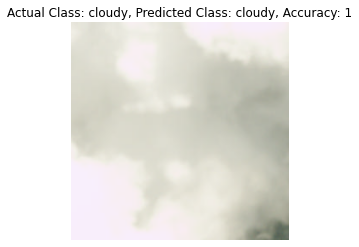

In [85]:
actual_class =[i for i in range(4)] 

# Calculate accuracy
accuracy = 1 if predicted_class in actual_class else 0

# Display the results
print(f"Actual Class: {class_idx_to_name[actual_class]}, Predicted Class: {class_idx_to_name[predicted_class]}, Accuracy: {accuracy}")

# Display the image along with the predicted class and its probability
predicted_class_name = class_idx_to_name[predicted_class]

# Plot the image
plt.imshow(image)
plt.title(f'Actual Class: {class_idx_to_name[actual_class]}, Predicted Class: {predicted_class_name}, Accuracy: {accuracy}')
plt.axis('off')